# Lets Grow More Internship December-2022


Author : Abhinaba Sarkar


Stock Market Prediction and Forecasting Using Stacked LSTM


Using Keras and Tensorflow

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
%matplotlib inline

2022-12-27 17:59:48.401370: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-27 17:59:48.600862: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-27 17:59:48.607885: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-27 17:59:48.607919: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudar

In [2]:
df = pd.read_csv('Reliance.csv')
df = df.dropna()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-11-18,463.799988,465.649994,454.975006,456.000000,436.671021,5142766.0
1,2015-11-19,459.450012,469.350006,458.625000,467.375000,447.563873,5569752.0
2,2015-11-20,467.000000,476.399994,462.774994,473.424988,453.357422,5167930.0
3,2015-11-23,475.000000,478.950012,473.100006,476.875000,456.661224,4800026.0
4,2015-11-24,476.500000,485.799988,475.524994,483.850006,463.340515,6768886.0


In [3]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1228,2020-11-10,2077.0,2090.000000,2041.199951,2084.550049,2084.550049,17045147.0
1229,2020-11-11,2089.0,2095.000000,1978.099976,1997.199951,1997.199951,26178477.0
1230,2020-11-12,1981.0,2008.449951,1965.000000,1980.000000,1980.000000,18481466.0
1231,2020-11-13,1982.0,2036.650024,1981.750000,1996.400024,1996.400024,20946864.0
1232,2020-11-17,2085.0,2085.000000,1985.000000,1993.250000,1993.250000,21479385.0


In [4]:
df_close = df['Close']

In [5]:
df_close.shape

(1232,)

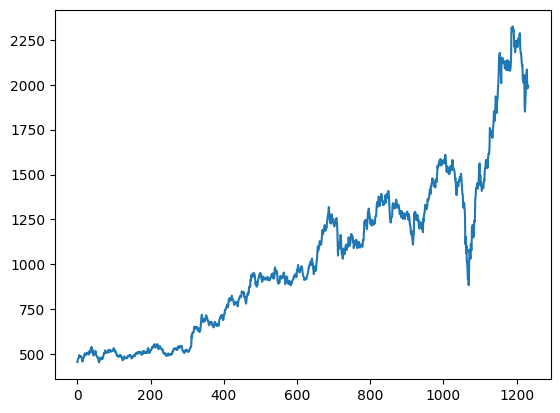

In [6]:
plt.plot(df_close)

In [7]:
scaler = MinMaxScaler(feature_range = (0,1))
df_close = scaler.fit_transform(np.array(df_close).reshape(-1,1))

In [8]:
df_close.shape

(1232, 1)

In [9]:
df_close

array([[0.00145623],
       [0.00753497],
       [0.01076806],
       ...,
       [0.81587418],
       [0.82463827],
       [0.82295492]])

In [10]:
training_size = int(len(df_close) * 0.75)
test_size = len(df_close) - training_size
train_data, test_data = df_close[0:training_size,:], df_close[training_size:len(df_close),:1]

In [11]:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [12]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [13]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [40]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)


Epoch 1/100
13/13 [==============================] - 25s 1s/step - loss: 0.0261 - val_loss: 0.0463
Epoch 2/100
13/13 [==============================] - 12s 904ms/step - loss: 0.0054 - val_loss: 0.0059
Epoch 3/100
13/13 [==============================] - 12s 949ms/step - loss: 0.0015 - val_loss: 0.0065
Epoch 4/100
13/13 [==============================] - 7s 553ms/step - loss: 7.5137e-04 - val_loss: 0.0054
Epoch 5/100
13/13 [==============================] - 13s 1s/step - loss: 5.8193e-04 - val_loss: 0.0064
Epoch 6/100
13/13 [==============================] - 13s 999ms/step - loss: 5.2092e-04 - val_loss: 0.0059
Epoch 7/100
13/13 [==============================] - 12s 943ms/step - loss: 5.3183e-04 - val_loss: 0.0056
Epoch 8/100
13/13 [==============================] - 14s 1s/step - loss: 5.1321e-04 - val_loss: 0.0054
Epoch 9/100
13/13 [==============================] - 15s 1s/step - loss: 4.8705e-04 - val_loss: 0.0062
Epoch 10/100
13/13 [==============================] - 14s 1s/step - los

Epoch 79/100
13/13 [==============================] - 9s 678ms/step - loss: 2.7089e-04 - val_loss: 0.0025
Epoch 80/100
13/13 [==============================] - 9s 674ms/step - loss: 2.5573e-04 - val_loss: 0.0019
Epoch 81/100
13/13 [==============================] - 9s 663ms/step - loss: 2.5558e-04 - val_loss: 0.0022
Epoch 82/100
13/13 [==============================] - 9s 681ms/step - loss: 2.4087e-04 - val_loss: 0.0020
Epoch 83/100
13/13 [==============================] - 9s 670ms/step - loss: 2.5552e-04 - val_loss: 0.0024
Epoch 84/100
13/13 [==============================] - 9s 692ms/step - loss: 2.3994e-04 - val_loss: 0.0021
Epoch 85/100
13/13 [==============================] - 9s 654ms/step - loss: 2.3386e-04 - val_loss: 0.0023
Epoch 86/100
13/13 [==============================] - 9s 672ms/step - loss: 2.3338e-04 - val_loss: 0.0021
Epoch 87/100
13/13 [==============================] - 8s 660ms/step - loss: 2.2955e-04 - val_loss: 0.0025
Epoch 88/100
13/13 [==========================

In [28]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [29]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [30]:
math.sqrt(mean_squared_error(y_train, train_predict))

926.4894807380695

In [31]:
math.sqrt(mean_squared_error(y_test, test_predict))

1734.4828567198563

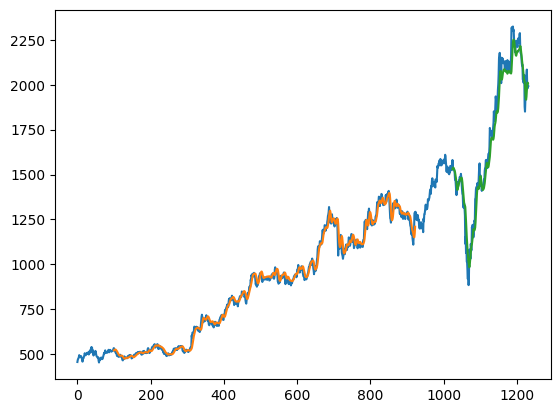

In [32]:
look_back = 100
trainPredictPlot = np.empty_like(df_close)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

#Shift test prediction for plotting
testPredictPlot = np.empty_like(df_close)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(df_close) - 1, :] = test_predict

#Plot baseline and predictions
plt.plot(scaler.inverse_transform(df_close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [33]:
len(test_data), x_test.shape

(308, (207, 100, 1))

In [34]:
x_input = test_data[207:].reshape(1,-1)
x_input.shape

(1, 101)

In [35]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [36]:
lst_output=[]
n_steps=100
nextNumberOfDays = 30
i=0

while(i<nextNumberOfDays):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.67861484 0.66843459 0.68633683 0.69849431 0.71321692 0.74736477
 0.73221462 0.7186143  0.73264216 0.76139264 0.79182641 0.7822073
 0.74319647 0.74287584 0.77937498 0.78375706 0.81135857 0.82869966
 0.85745014 0.90466386 0.91003455 0.92152404 0.8782113  0.88473103
 0.86242004 0.83137164 0.90704202 0.8941363  0.8982245  0.9048242
 0.89060937 0.89806416 0.89475093 0.89178502 0.88737626 0.87537912
 0.88991463 0.89686177 0.87842514 0.87030236 0.8777304  0.87043596
 0.89993454 0.88566622 0.88863201 0.86968773 0.87318804 0.89507149
 0.88646781 0.86784409 0.87072978 0.88379584 0.91278677 0.99436211
 0.99743488 0.98824331 0.99695397 1.         0.98621258 0.9899266
 0.96328709 0.93939953 0.94990047 0.92339443 0.93434952 0.942125
 0.9575156  0.9517976  0.94693455 0.93996067 0.93897212 0.96416879
 0.95441608 0.95131656 0.95324044 0.97656673 0.98020064 0.93691465
 0.92050875 0.92072245 0.90987421 0.89314775 0.8837156  0.88697546
 0.84211296 0.84499871 0.83268088 0.84093732 0.85568661

7 day output [[0.78371364]]
8 day input [0.73264216 0.76139264 0.79182641 0.7822073  0.74319647 0.74287584
 0.77937498 0.78375706 0.81135857 0.82869966 0.85745014 0.90466386
 0.91003455 0.92152404 0.8782113  0.88473103 0.86242004 0.83137164
 0.90704202 0.8941363  0.8982245  0.9048242  0.89060937 0.89806416
 0.89475093 0.89178502 0.88737626 0.87537912 0.88991463 0.89686177
 0.87842514 0.87030236 0.8777304  0.87043596 0.89993454 0.88566622
 0.88863201 0.86968773 0.87318804 0.89507149 0.88646781 0.86784409
 0.87072978 0.88379584 0.91278677 0.99436211 0.99743488 0.98824331
 0.99695397 1.         0.98621258 0.9899266  0.96328709 0.93939953
 0.94990047 0.92339443 0.93434952 0.942125   0.9575156  0.9517976
 0.94693455 0.93996067 0.93897212 0.96416879 0.95441608 0.95131656
 0.95324044 0.97656673 0.98020064 0.93691465 0.92050875 0.92072245
 0.90987421 0.89314775 0.8837156  0.88697546 0.84211296 0.84499871
 0.83268088 0.84093732 0.85568661 0.76107195 0.74661661 0.78017657
 0.80251431 0.84213971 

15 day output [[0.75859785]]
16 day input [0.81135857 0.82869966 0.85745014 0.90466386 0.91003455 0.92152404
 0.8782113  0.88473103 0.86242004 0.83137164 0.90704202 0.8941363
 0.8982245  0.9048242  0.89060937 0.89806416 0.89475093 0.89178502
 0.88737626 0.87537912 0.88991463 0.89686177 0.87842514 0.87030236
 0.8777304  0.87043596 0.89993454 0.88566622 0.88863201 0.86968773
 0.87318804 0.89507149 0.88646781 0.86784409 0.87072978 0.88379584
 0.91278677 0.99436211 0.99743488 0.98824331 0.99695397 1.
 0.98621258 0.9899266  0.96328709 0.93939953 0.94990047 0.92339443
 0.93434952 0.942125   0.9575156  0.9517976  0.94693455 0.93996067
 0.93897212 0.96416879 0.95441608 0.95131656 0.95324044 0.97656673
 0.98020064 0.93691465 0.92050875 0.92072245 0.90987421 0.89314775
 0.8837156  0.88697546 0.84211296 0.84499871 0.83268088 0.84093732
 0.85568661 0.76107195 0.74661661 0.78017657 0.80251431 0.84213971
 0.85365588 0.8717452  0.82506575 0.81587418 0.82463827 0.82295492
 0.81778973 0.81193012 0.8064

23 day output [[0.7362167]]
24 day input [0.86242004 0.83137164 0.90704202 0.8941363  0.8982245  0.9048242
 0.89060937 0.89806416 0.89475093 0.89178502 0.88737626 0.87537912
 0.88991463 0.89686177 0.87842514 0.87030236 0.8777304  0.87043596
 0.89993454 0.88566622 0.88863201 0.86968773 0.87318804 0.89507149
 0.88646781 0.86784409 0.87072978 0.88379584 0.91278677 0.99436211
 0.99743488 0.98824331 0.99695397 1.         0.98621258 0.9899266
 0.96328709 0.93939953 0.94990047 0.92339443 0.93434952 0.942125
 0.9575156  0.9517976  0.94693455 0.93996067 0.93897212 0.96416879
 0.95441608 0.95131656 0.95324044 0.97656673 0.98020064 0.93691465
 0.92050875 0.92072245 0.90987421 0.89314775 0.8837156  0.88697546
 0.84211296 0.84499871 0.83268088 0.84093732 0.85568661 0.76107195
 0.74661661 0.78017657 0.80251431 0.84213971 0.85365588 0.8717452
 0.82506575 0.81587418 0.82463827 0.82295492 0.81778973 0.81193012
 0.80648977 0.80135936 0.79650998 0.79194993 0.78768659 0.78371364
 0.78000927 0.77654135 0.7

In [37]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [38]:
df3 = df_close.tolist()
df3.extend(lst_output)
len(df_close)

1232